In [ ]:
#Importing the required libraries for the dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Reading the Data

from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla (1).csv


In [ ]:
df=pd.read_csv("/content/ToyotaCorolla (1).csv",encoding="latin1")

In [ ]:
df

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [ ]:
df.tail()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0
1435,1442,TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors,6950,76,5,1998,1,Petrol,110,0,...,0,0,1,0,0,0,0,0,0,0


# **Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [ ]:
df.size

54568

In [ ]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df1=pd.concat([df.iloc[:,2:4],df.iloc[:,6:7],df.iloc[:,8:9],df.iloc[:,12:14],df.iloc[:,15:18]],axis=1)

In [ ]:
df1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
df1.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [ ]:
#Checking the miss values

df1.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [ ]:
#Checking the duplicate records

df1[df1.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
df2=df1.drop_duplicates()

In [ ]:
df2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
#Renaming the columns

df3=df2.rename({"Age_08_04":"Age"},axis=1)


In [ ]:
df3

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


# **Correlation Analysis**

In [ ]:
df3.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Quarterly_Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


# **Scatterplot Between variables along with histograms**

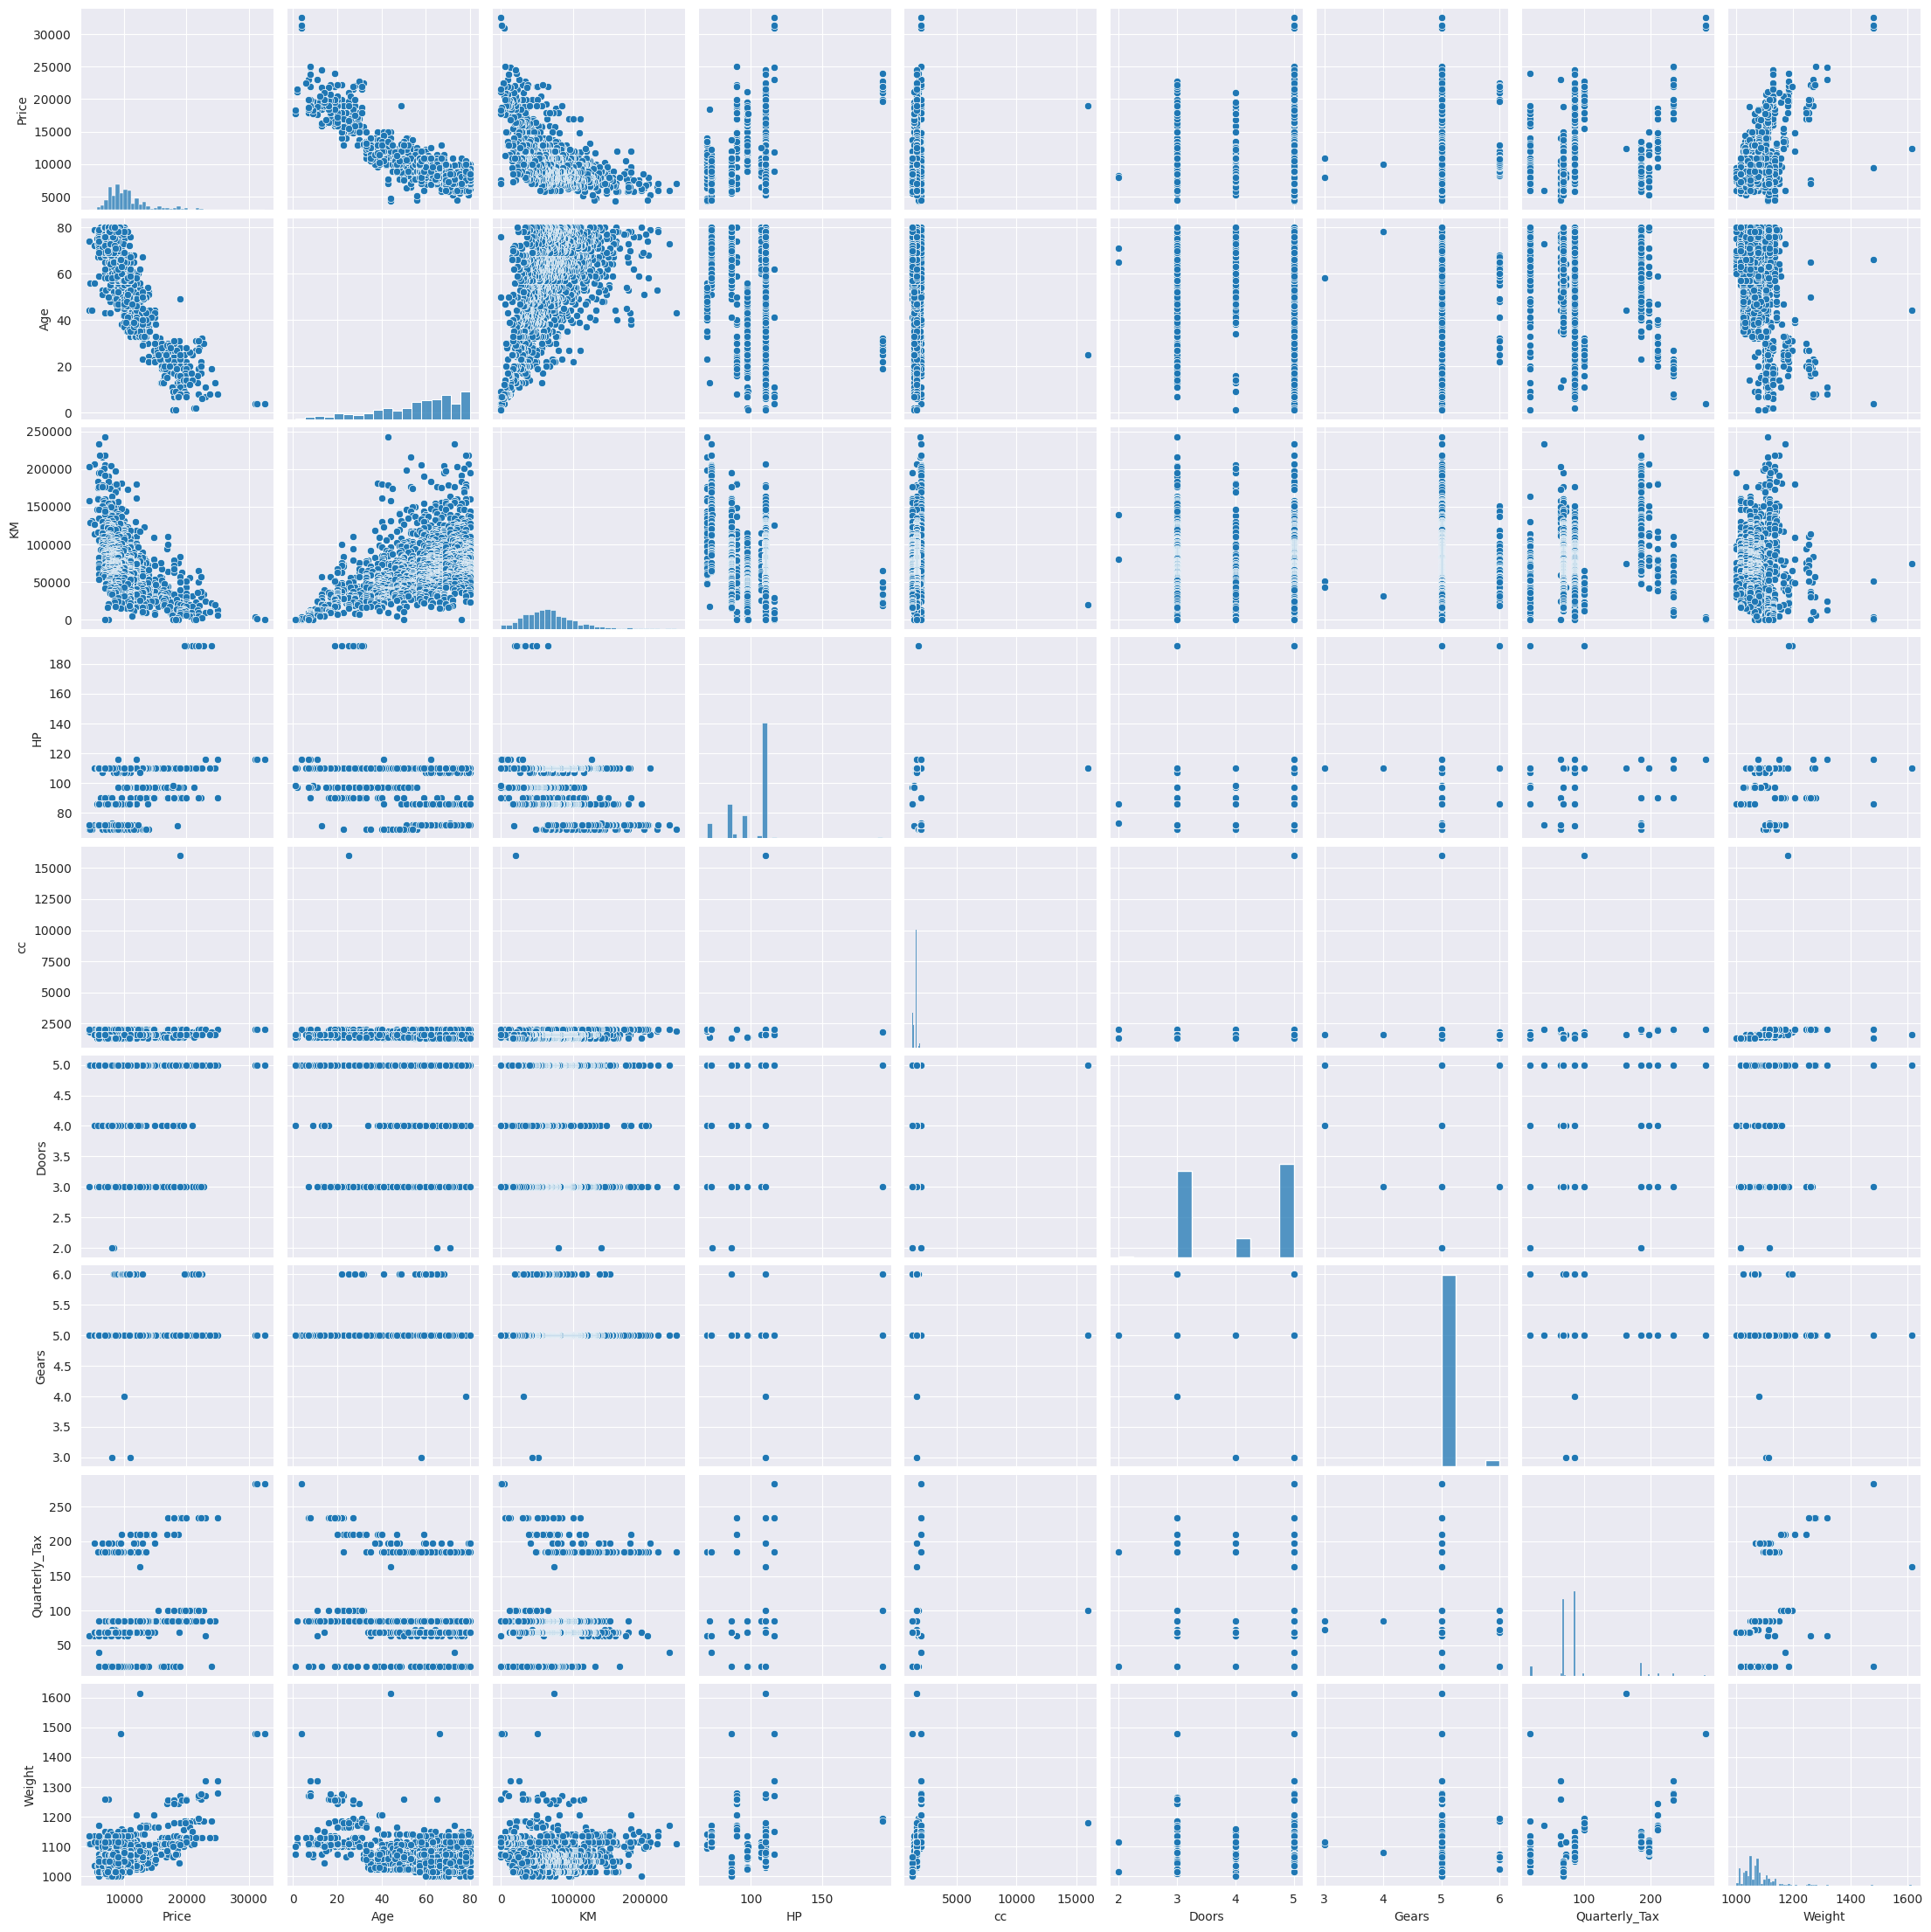

In [ ]:
sns.set_style(style="darkgrid")
sns.pairplot(df3)

# **Model Building**

In [ ]:
model=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=df3).fit()


# **Model Testing**

In [ ]:
#Co-efficient of model
model.params

Intercept       -5472.540368
Age              -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [ ]:
#Summary of model

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        15:50:44   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age            -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Since the p value for cc and Doors Spend is > 0.05 build simple linear regression and multi linear regression models  to see insignificant variables


# Build a simple linear model to check the column cc

slr_cc=smf.ols("Price~cc",data=df3).fit()

In [ ]:
slr_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.29e-06
Time:                        15:54:02   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Build a simple linear model to check the column Doors

slr_Doors=smf.ols("Price~Doors",data=df3).fit()

In [ ]:
slr_Doors

In [ ]:
slr_Doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.40e-12
Time:                        15:56:58   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Building the Multi Linear regression model of cc and Doors together

slr_cc_Doors=smf.ols("Price~cc+Doors",data=df3).fit()
slr_cc_Doors

In [ ]:
slr_cc_Doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.55e-15
Time:                        15:59:41   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
cc             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Model Validation Techniques**
There are Two Techniques

1) Collinearity Check - VIF

2) Residual Analysis

Calculating Variance Inflation Factor (VIF) = 1/1-r^2

In [66]:
rsq_age=smf.ols("Age~KM+HP+cc++Doors+Gears+Quarterly_Tax+Weight",data=df3).fit().rsquared
vif_age=1/(1-rsq_age)
vif_age



1.8762358497682892

In [67]:
rsq_km=smf.ols("KM~Age+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=df3).fit().rsquared
vif_km=1/(1-rsq_km)
vif_km



1.75717802398104

In [68]:
rsq_hp=smf.ols("HP~KM+Age+cc+Doors+Gears+Quarterly_Tax+Weight",data=df3).fit().rsquared
vif_hp=1/(1-rsq_hp)
vif_hp



1.4191801087182137

In [69]:
rsq_cc=smf.ols("cc~Age+KM+HP+Doors+Gears+Quarterly_Tax+Weight",data=df3).fit().rsquared
vif_cc=1/(1-rsq_cc)
vif_cc



1.1634703645940856

In [70]:
rsq_doors=smf.ols("Doors~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight",data=df3).fit().rsquared
vif_doors=1/(1-rsq_doors)
vif_doors



1.1558898658142076

In [71]:
rsq_gears=smf.ols("Gears~Age+KM+HP+cc+Doors+Quarterly_Tax+Weight",data=df3).fit().rsquared
vif_gears=1/(1-rsq_gears)
vif_gears



1.0988429081631148

In [72]:
rsq_Quarterly_Tax=smf.ols("Quarterly_Tax~Age+KM+HP+cc+Doors+Gears+Weight",data=df3).fit().rsquared
vif_Quarterly_Tax=1/(1-rsq_Quarterly_Tax)
vif_Quarterly_Tax



2.295374508985715

In [73]:
rsq_weight=smf.ols("Weight~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax",data=df3).fit().rsquared
vif_weight=1/(1-rsq_weight)
vif_weight

2.4871800071791856

In [75]:
#Sorting the VIF values in a DataFrame

dataframe = {'Variables':['Age','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_Quarterly_Tax,vif_weight]}
Vif_frame=pd.DataFrame(dataframe)
Vif_frame

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Quarterly_Tax,2.295375
7,Weight,2.487180


Since No value of VIF is greater than 20 , we can say that there is no collinearity problem. So we shall consider all columns for building the model

# **Residual Analysis**

# **Test for Normality of Residuals (Q-Q Plot)**

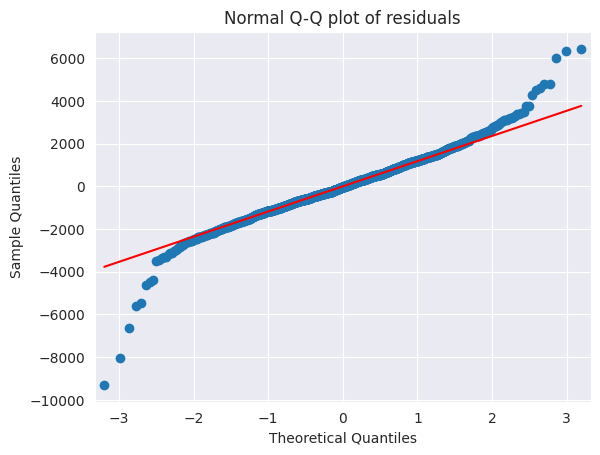

In [77]:
import statsmodels.api as sm
sns.set_style(style="darkgrid")
qqplot=sm.qqplot(model.resid,line="q")
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [78]:
list(np.where(model.resid<-4000))

[array([190, 191, 220, 392, 401, 600, 653, 959])]

Residual Plot for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)



In [79]:
def get_standardized_values(vals):
  return(vals-vals.mean())/vals.std()

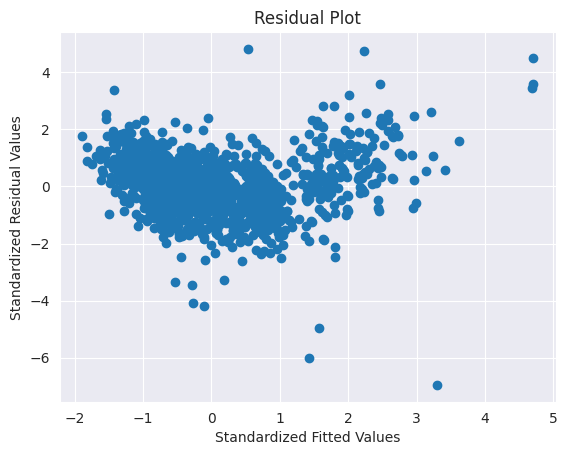

In [82]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title("Residual Plot")
plt.xlabel("Standardized Fitted Values")
plt.ylabel("Standardized Residual Values")
plt.show()

Residual Vs Regressor

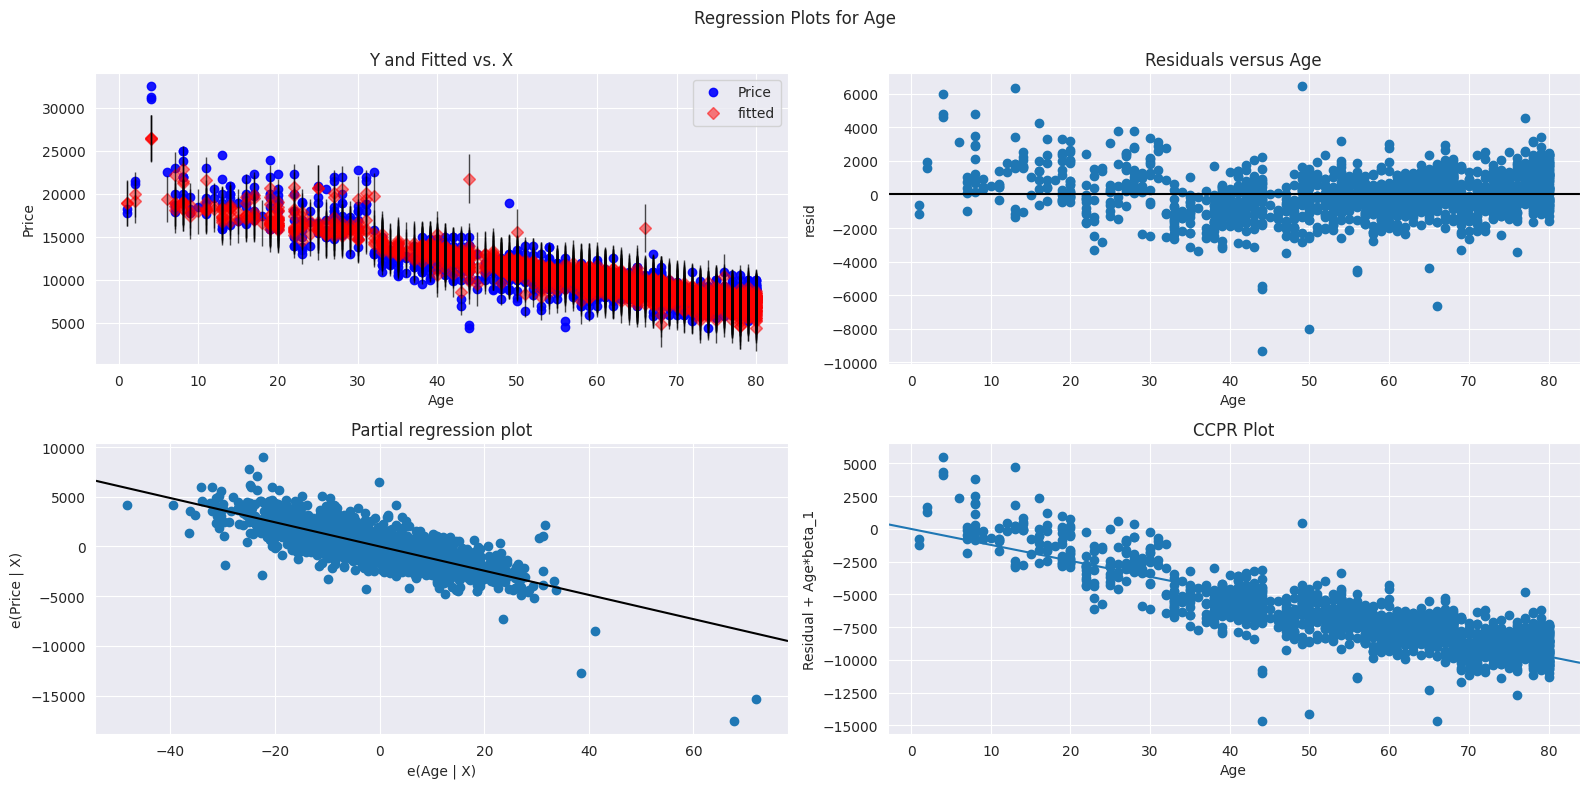

In [85]:
fig=plt.figure(figsize=(16,8))
fig=sm.graphics.plot_regress_exog(model,"Age",fig=fig)
plt.show()

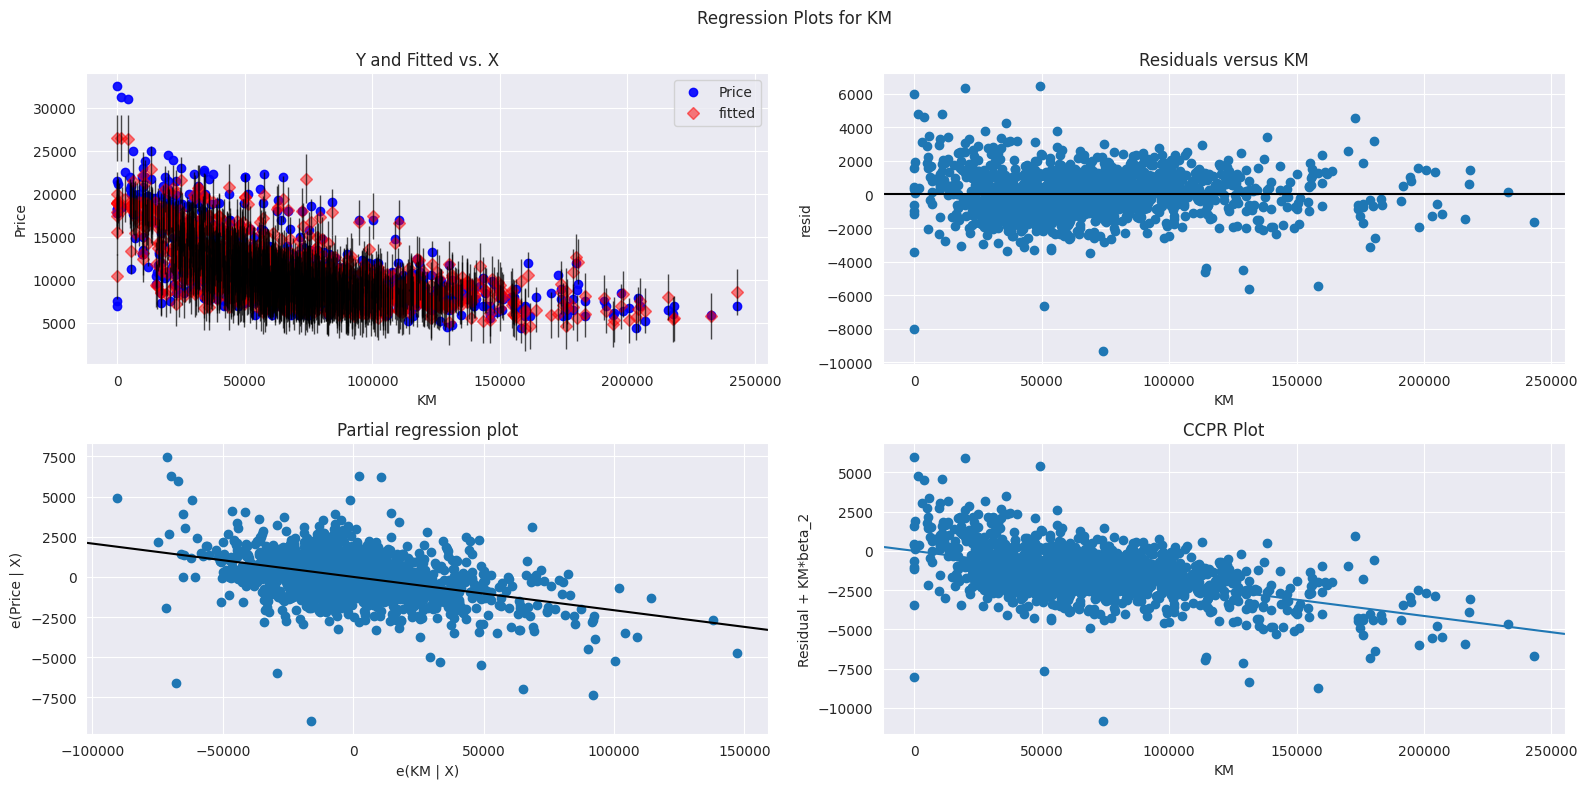

In [89]:
fig=plt.figure(figsize=(16,8))
fig=sm.graphics.plot_regress_exog(model,"KM",fig=fig)
plt.show()

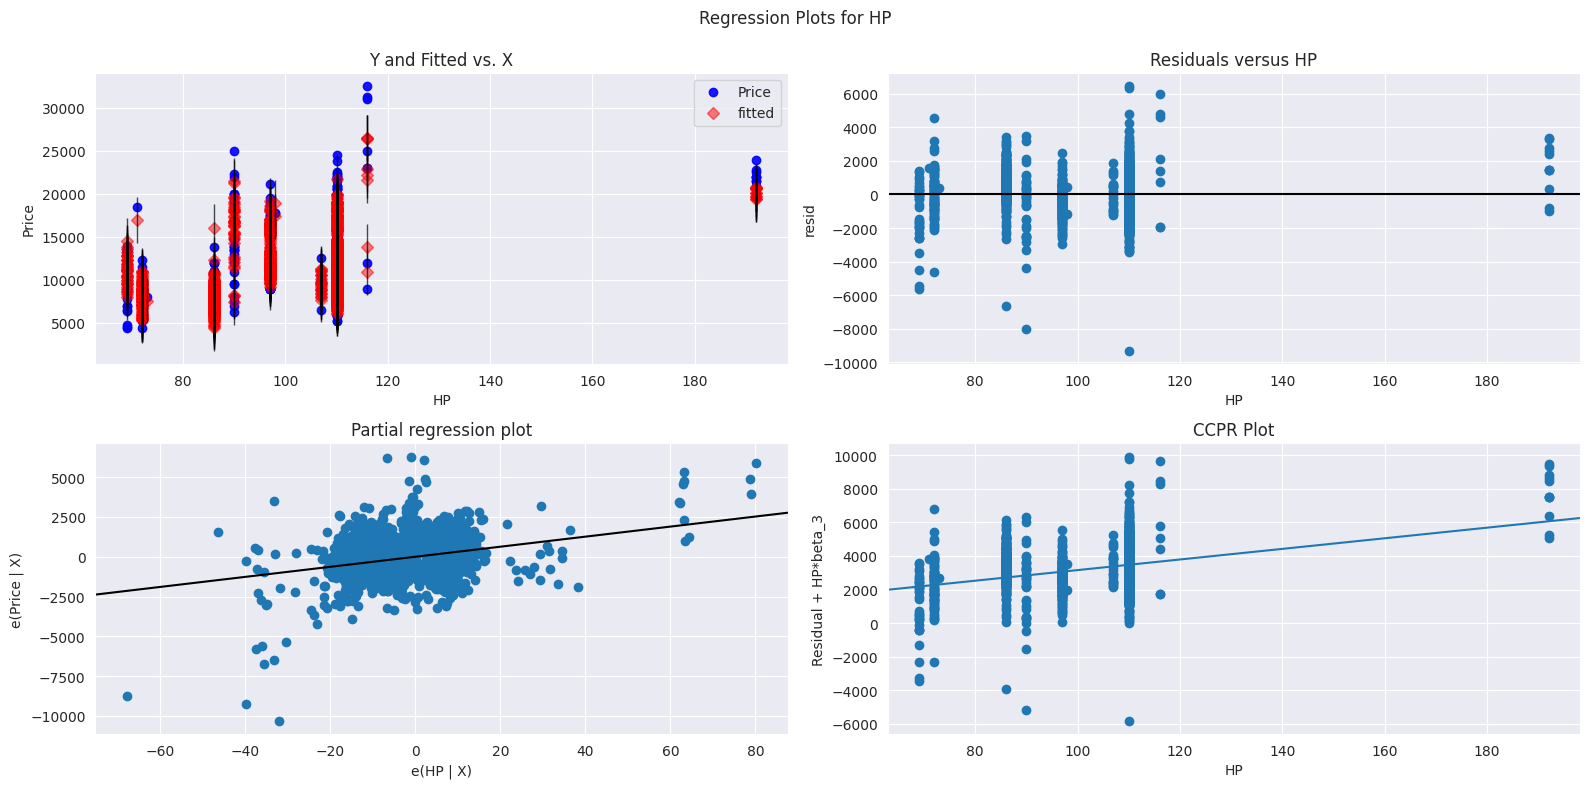

In [90]:
fig=plt.figure(figsize=(16,8))
fig=sm.graphics.plot_regress_exog(model,"HP",fig=fig)
plt.show()


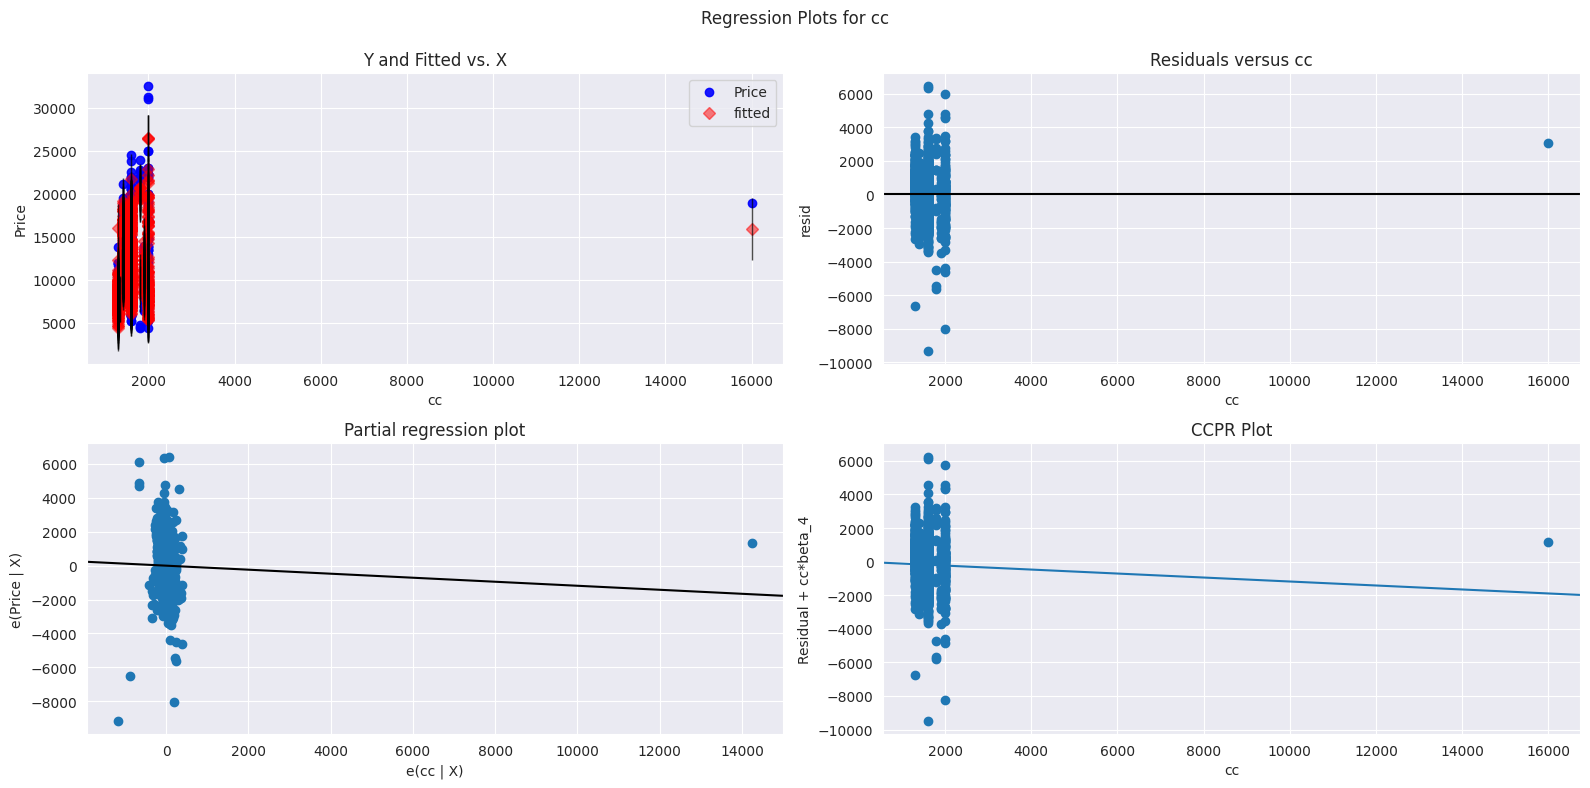

In [92]:
fig=plt.figure(figsize=(16,8))
fig=sm.graphics.plot_regress_exog(model,"cc",fig=fig)
plt.show()


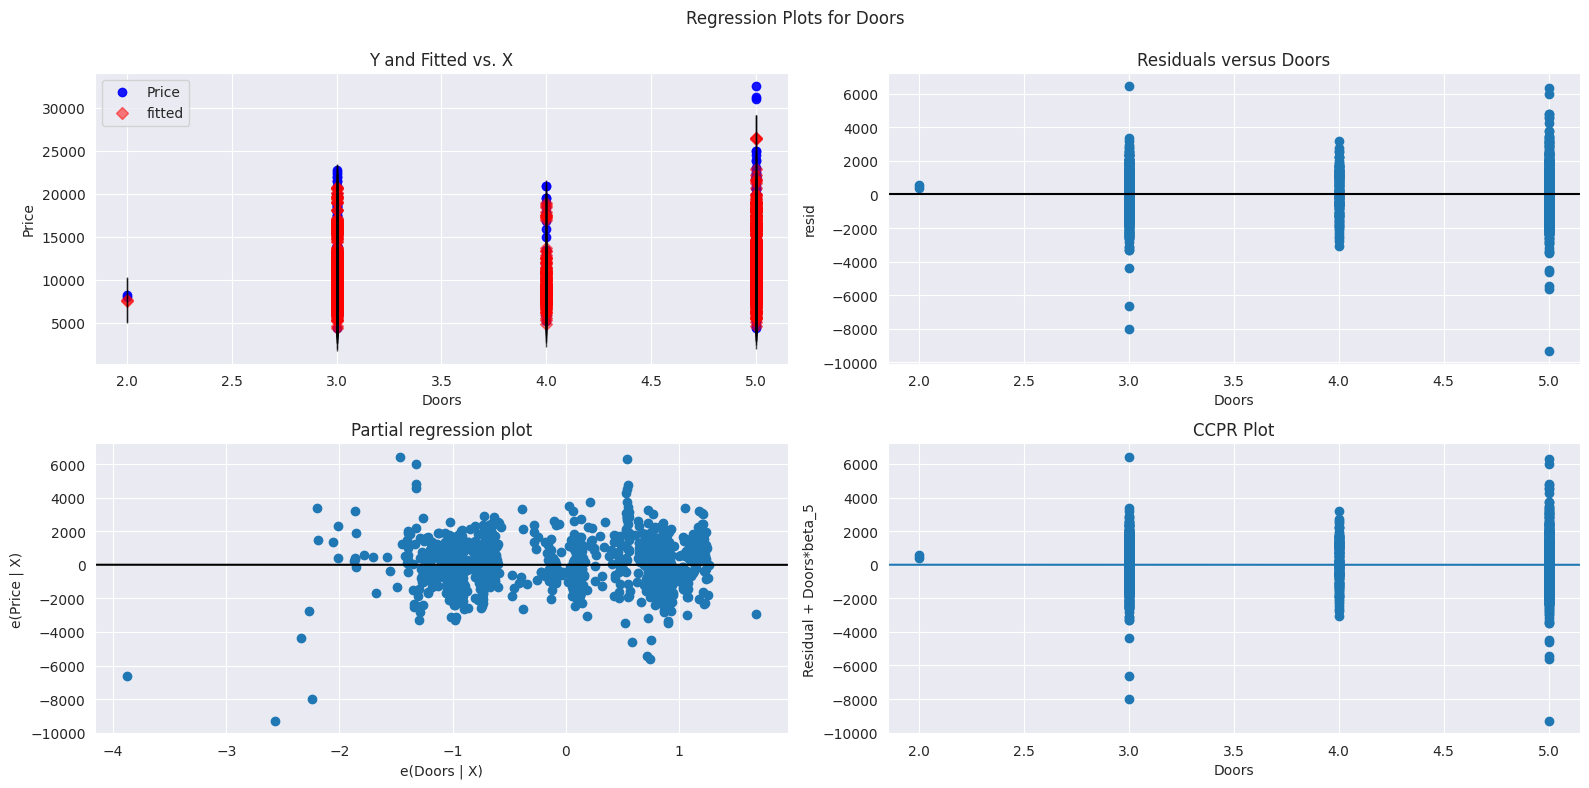

In [93]:
fig=plt.figure(figsize=(16,8))
fig=sm.graphics.plot_regress_exog(model,"Doors",fig=fig)
plt.show()


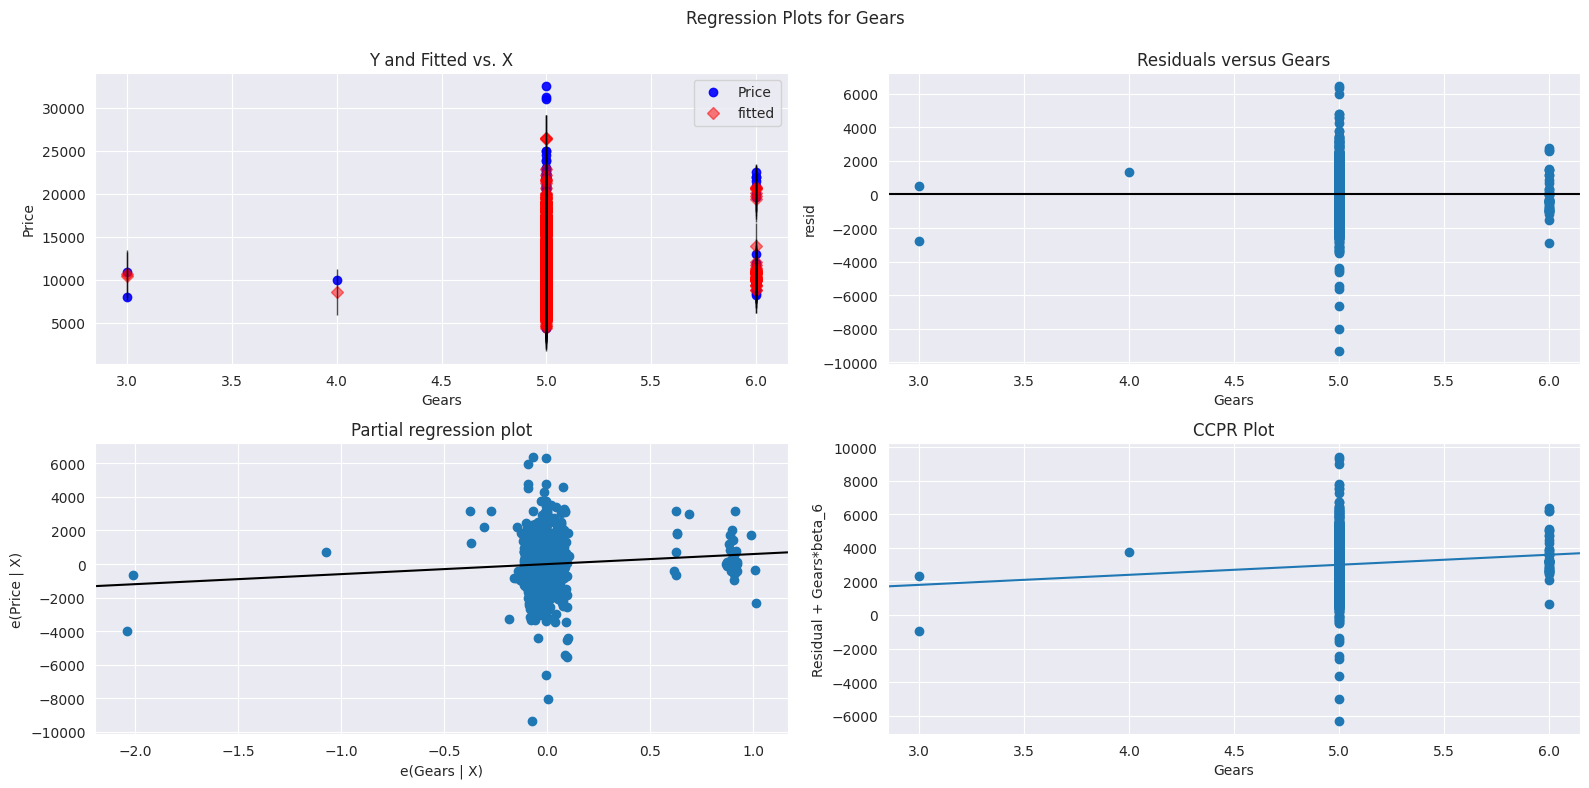

In [94]:
fig=plt.figure(figsize=(16,8))
fig=sm.graphics.plot_regress_exog(model,"Gears",fig=fig)
plt.show()


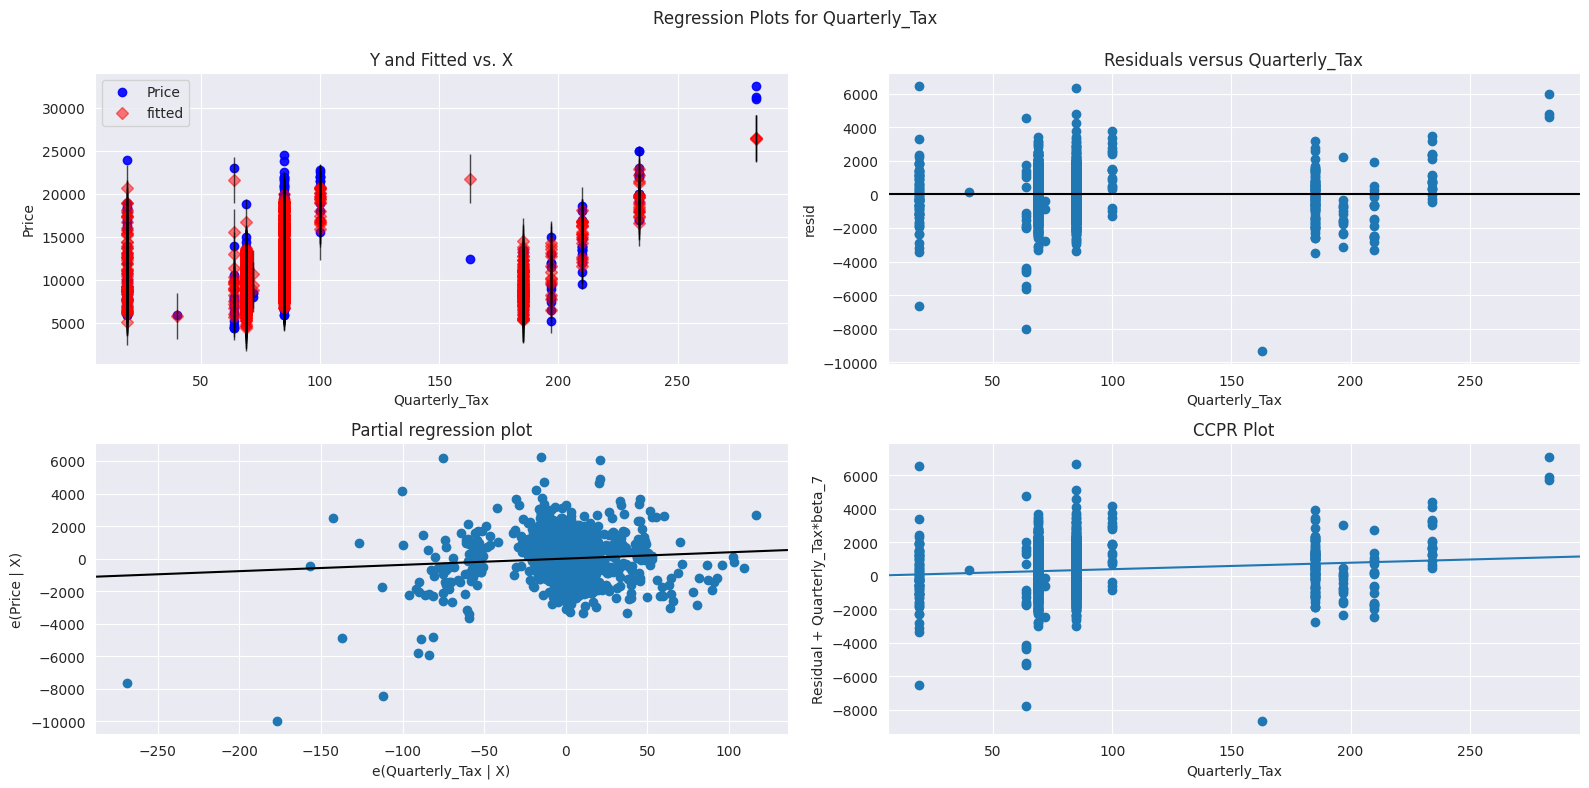

In [95]:
fig=plt.figure(figsize=(16,8))
fig=sm.graphics.plot_regress_exog(model,"Quarterly_Tax",fig=fig)
plt.show()


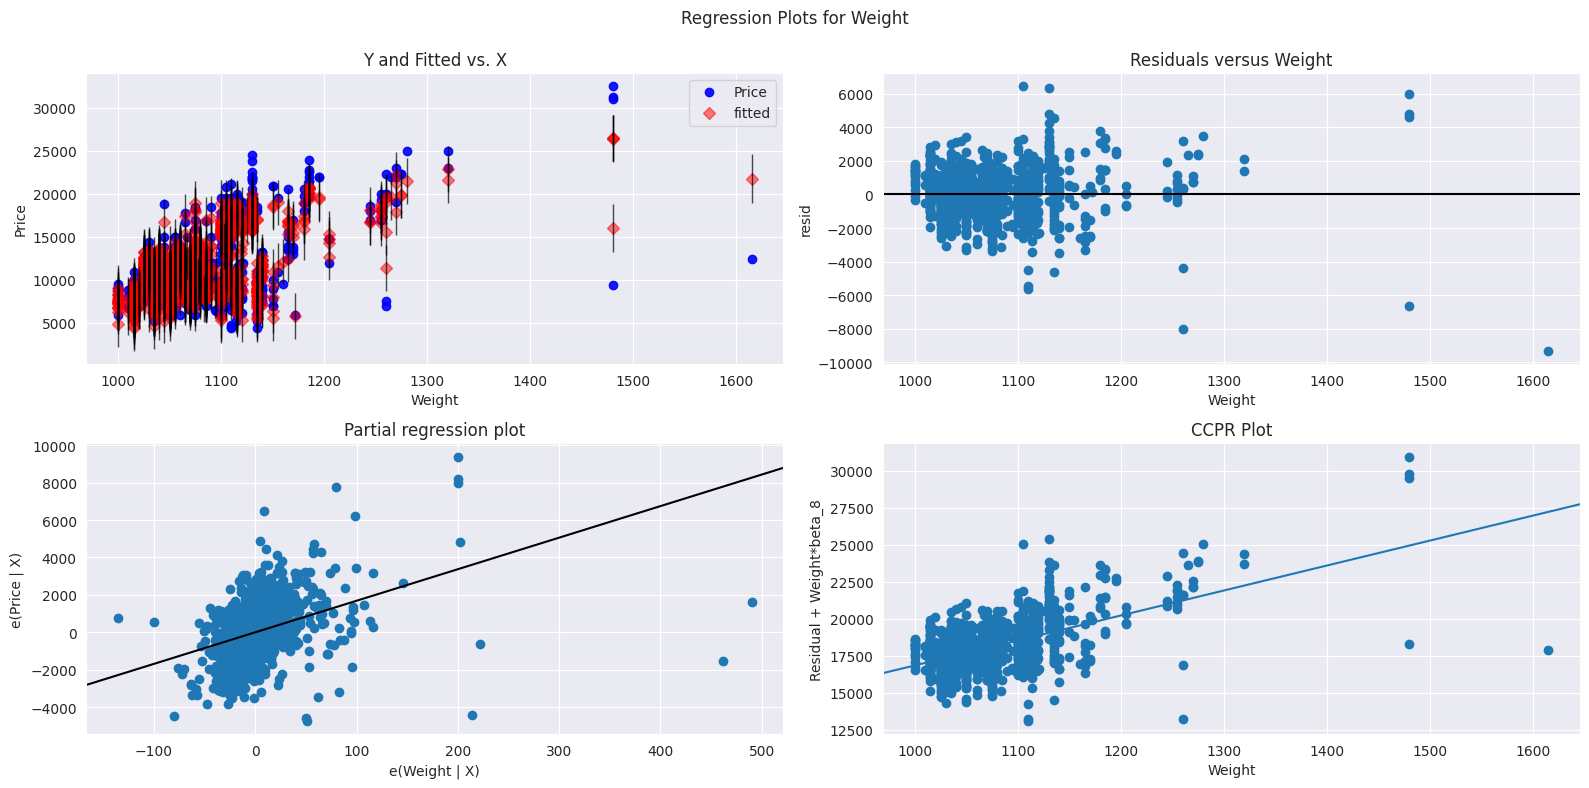

In [96]:
fig=plt.figure(figsize=(16,8))
fig=sm.graphics.plot_regress_exog(model,"Weight",fig=fig)
plt.show()


# **Model Deletion Diagnostics**

Detecting Influencers / Outliers

Cooks Distance

In [97]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

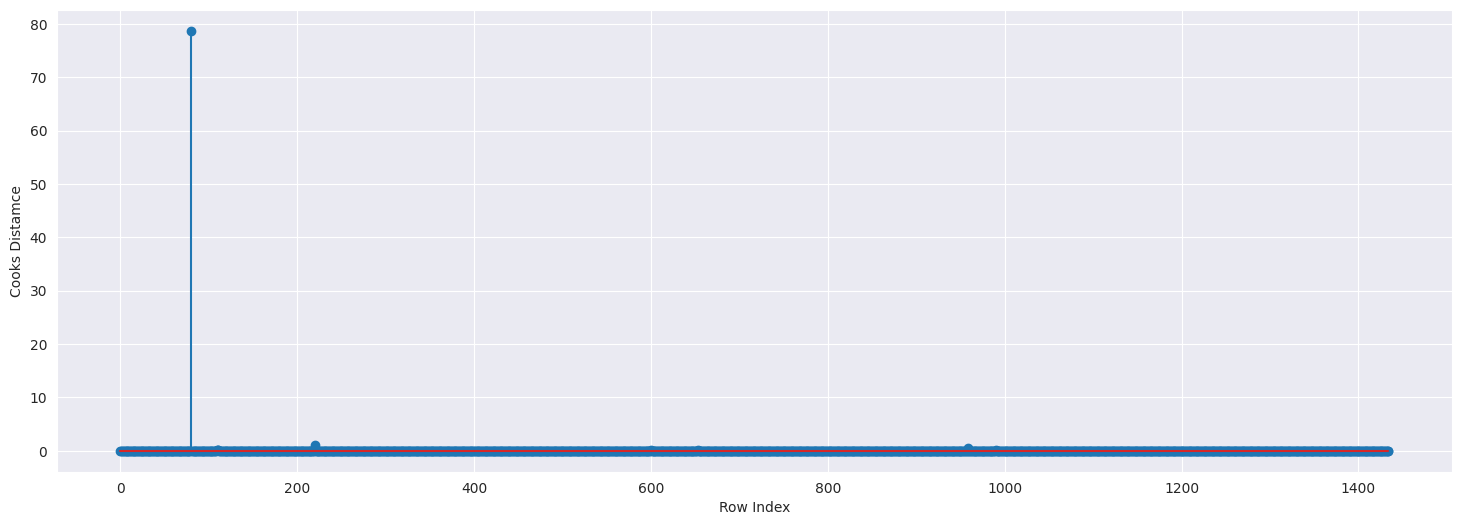

In [98]:
#Plotting the influencers values using stem plot

sns.set_style(style="darkgrid")
fig=plt.subplots(figsize=(18,6))
plt.stem(np.arange(len(df3)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distamce")
plt.show()


In [99]:

# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(80, 78.72950582258932)

# **High Influence Plots**

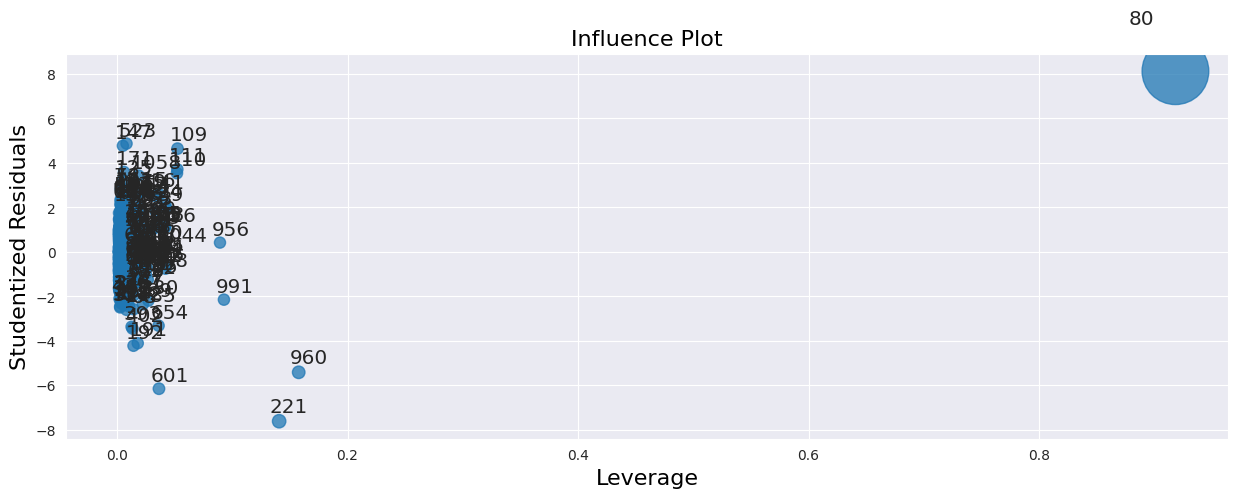

In [101]:
fig,ax=plt.subplots(figsize=(15,5))
fig=influence_plot(model,ax=ax)

In [102]:
k=df3.shape[1]
n=df3.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.020905923344947737

In [103]:
df3[df3.index.isin([221,960,80])]

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180
221,12450,44,74172,110,1600,5,5,163,1615
960,9390,66,50806,86,1300,3,5,19,1480


In [104]:
df3.shape

(1435, 9)

# **Improving the model**

In [105]:
#Discard the data points which are influencers and reasign the row number (reset_index())

df4=df3.copy()

df4=df3.drop(df3.index[[80,221,960,]],axis=0).reset_index(drop=True)
df4

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,86,1300,3,5,69,1025
1428,10845,72,19000,86,1300,3,5,69,1015
1429,8500,71,17016,86,1300,3,5,69,1015
1430,7250,70,16916,86,1300,3,5,69,1015


# **Model Deletion Diagnostics**

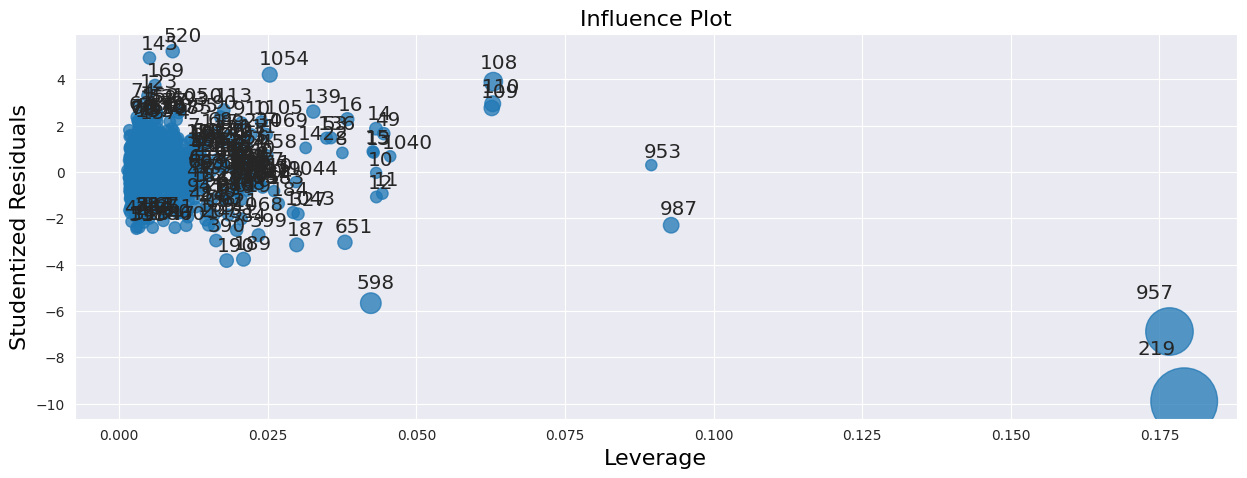

In [106]:
# Check again for influencers and Outliers

model1 = smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=df4).fit()
fig,ax=plt.subplots(figsize=(15,5))
fig=influence_plot(model1,ax = ax)

In [109]:
k=df4.shape[1]
n=df4.shape[0]
leverage_cutoff1=3*((k+1/n))
leverage_cutoff1

27.00209497206704

In [110]:
#Discard the data points which are influencers and reasign the row number (reset_index())

df4=df4.copy()
df5=df4.drop(df4.index[[219,957,987,953]],axis=0).reset_index(drop=True)
df5

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1423,7500,69,20544,86,1300,3,5,69,1025
1424,10845,72,19000,86,1300,3,5,69,1015
1425,8500,71,17016,86,1300,3,5,69,1015
1426,7250,70,16916,86,1300,3,5,69,1015


# **Final Model**

In [111]:
Final_Model=smf.ols("Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight",data=df5).fit()

In [112]:
Final_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     1363.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        17:49:10   Log-Likelihood:                -12180.
No. Observations:                1428   AIC:                         2.438e+04
Df Residuals:                    1419   BIC:                         2.442e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.398e+04   1469.163     -9.513      0.000   -1.69e+04   -1.11e+04
Age            -111.8216      2.478    -45.129      0.000    -116.682    -106.961
KM               -0.0170      0.001    -14.160      0.000      -0.019      -0.015
HP               37.2559      2.757     13.512      0.000      31.847      42.665
cc               -3.8001      0.302    -12.582      0.000      -4.393      -3.208
Doors          -128.6302     37.586     -3.422      0.001    -202.360     -54.901
Gears           281.4918    199.251      1.413      0.158    -109.367     672.351
Quarterly_Tax     5.1601      1.370      3.768      0.000       2.474       7.847
Weight           30.7493      1.296     23.733      0.000      28.208      33.291
==============================================================================
Omnibus:                      122.881   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              723.470
Skew:                          -0.077   Prob(JB):                    7.95e-158
Kurtosis:                       6.484   Cond. No.                     3.55e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.55e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **Model Predictions**

In [113]:
#New data for prediction

new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"cc":1300,"Doors":4,"Gears":5,"Quarterly_Tax":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,12,40000,80,1300,4,5,69,1012


In [114]:
#Manual Prediction

Final_Model.predict(new_data)

0    14410.990518
dtype: float64

In [115]:
#Auto Predict

pred_y=Final_Model.predict(df5)
pred_y

0       16335.790261
1       15895.513616
2       16313.462654
3       15983.122172
4       15850.756368
            ...     
1423     9119.149472
1424     8502.386345
1425     8647.867902
1426     8761.386098
1427    10660.471327
Length: 1428, dtype: float64